# **Installing necessary packages**

In [1]:
!pip install torch
!pip install datasets
!pip install transformers sentencepiece
!pip install sacrebleu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# **Loading our dataset through HuggingFace**

In [2]:
from datasets import load_dataset

dataset = load_dataset("opus100", "en-vi")
dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/137k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/59.0M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/138k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['translation'],
        num_rows: 2000
    })
    train: Dataset({
        features: ['translation'],
        num_rows: 1000000
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2000
    })
})

In [3]:

print(dataset)
print(dataset['train'][0])


DatasetDict({
    test: Dataset({
        features: ['translation'],
        num_rows: 2000
    })
    train: Dataset({
        features: ['translation'],
        num_rows: 1000000
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2000
    })
})
{'translation': {'en': 'What is it?', 'vi': 'Cái gì đó?'}}


In [10]:

batch_size = 16
num_train_epochs = 8
learning_rate = 3e-5

# **Forming our transformer**

In [6]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-vi")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-vi")

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/809k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/756k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/289M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [7]:
max_input_length = 128
max_target_length = 128
source_lang = "en"
target_lang = "vi"
def preprocess_function(examples):
   inputs = [ex[source_lang] for ex in examples["translation"]]
   targets = [ex[target_lang] for ex in examples["translation"]]
   model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

   with tokenizer.as_target_tokenizer():
       labels = tokenizer(targets, max_length=max_target_length, truncation=True)
   model_inputs["labels"] = labels["input_ids"]
   return model_inputs
tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


model.safetensors:   0%|          | 0.00/289M [00:00<?, ?B/s]

Map:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [8]:

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(800))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(800))

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing packages for the training of the model**

In [11]:
from transformers import DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [12]:
!pip install -U transformers

In [15]:
!pip install evaluate
!pip install rouge_score
from transformers import Seq2SeqTrainingArguments
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainer, Seq2SeqTrainingArguments, EarlyStoppingCallback
from datasets import load_dataset
import evaluate
import numpy as np
import matplotlib.pyplot as plt
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

metric_bleu = evaluate.load("sacrebleu")
metric_rouge = evaluate.load("rouge")
metric_meteor = evaluate.load("meteor")




  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=8e7c1f9c7f495d16fe9c0c1fbcd7ea3d19fbe739f100bb455734e58cfcfd4b74
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [22]:
!pip install -U transformers


from transformers import Seq2SeqTrainingArguments

args = Seq2SeqTrainingArguments(
    output_dir="marianMT-finetuned-en-vi",

    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=8,
    predict_with_generate=True,
    report_to=["none"],
)





In [19]:
import evaluate
import numpy as np

bleu_metric = evaluate.load("sacrebleu")
rouge_metric = evaluate.load("rouge")

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]  # BLEU expects list of lists
    labels_for_rouge = [label[0] for label in labels]  # ROUGE expects flat list
    return preds, labels, labels_for_rouge

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]

    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels = np.where(labels != -100, tokenizer.pad_token_id, labels)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Postprocess
    decoded_preds, decoded_labels_bleu, decoded_labels_rouge = postprocess_text(decoded_preds, decoded_labels)

    # Compute BLEU
    bleu_result = bleu_metric.compute(predictions=decoded_preds, references=decoded_labels_bleu)

    # Compute ROUGE
    rouge_result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels_rouge, use_stemmer=True)

    # Compute generation length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]

    # Combine metrics
    result = {
        "bleu": bleu_result["score"],
        "rouge1": rouge_result["rouge1"],
        "rouge2": rouge_result["rouge2"],
        "rougeL": rouge_result["rougeL"],
        "gen_len": np.mean(prediction_lens),
    }

    return {k: round(v, 4) for k, v in result.items()}


In [23]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


<ipython-input-23-4797bb78283c>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Step,Training Loss
50,1.437200
100,1.266800
150,1.197000
200,1.107100
250,1.031900
300,0.965200
350,0.923600
400,0.897300


TrainOutput(global_step=400, training_loss=1.103243236541748, metrics={'train_runtime': 77.5057, 'train_samples_per_second': 82.575, 'train_steps_per_second': 5.161, 'total_flos': 39834816086016.0, 'train_loss': 1.103243236541748, 'epoch': 8.0})

In [24]:

predictions = trainer.predict(small_eval_dataset)


decoded_preds = tokenizer.batch_decode(predictions.predictions, skip_special_tokens=True)
decoded_labels = tokenizer.batch_decode(
    np.where(predictions.label_ids != -100, predictions.label_ids, tokenizer.pad_token_id),
    skip_special_tokens=True
)


def postprocess(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]
    return preds, labels

decoded_preds, decoded_labels = postprocess(decoded_preds, decoded_labels)
references_bleu = [[label] for label in decoded_labels]  # BLEU expects list of lists

import evaluate
metric_bleu = evaluate.load("sacrebleu")
metric_rouge = evaluate.load("rouge")
metric_meteor = evaluate.load("meteor")

bleu = metric_bleu.compute(predictions=decoded_preds, references=references_bleu)
rouge = metric_rouge.compute(predictions=decoded_preds, references=decoded_labels)
meteor = metric_meteor.compute(predictions=decoded_preds, references=decoded_labels)

print("BLEU:", round(bleu["score"], 4))
print("ROUGE-L:", round(rouge["rougeL"], 4))
print("METEOR:", round(meteor["meteor"], 4))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU: 16.7184
ROUGE-L: 0.5462
METEOR: 0.4953


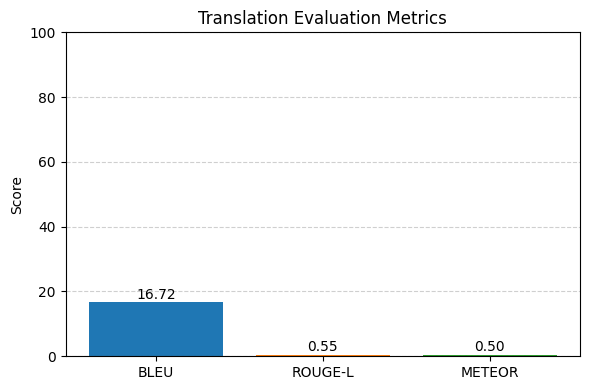

In [25]:
import matplotlib.pyplot as plt


scores = {
    "BLEU": round(bleu["score"], 4),
    "ROUGE-L": round(rouge["rougeL"], 4),
    "METEOR": round(meteor["meteor"], 4),
}


plt.figure(figsize=(6, 4))
plt.bar(scores.keys(), scores.values(), color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.ylabel("Score")
plt.title("Translation Evaluation Metrics")
plt.ylim(0, 100)
for i, (key, value) in enumerate(scores.items()):
    plt.text(i, value + 1, f"{value:.2f}", ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


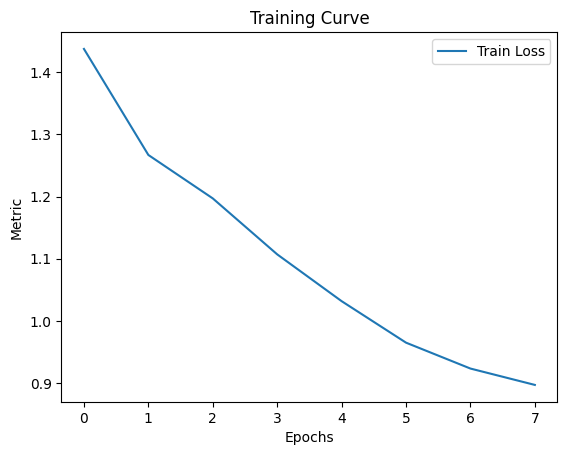

In [26]:
loss_vals = trainer.state.log_history
train_losses = [x["loss"] for x in loss_vals if "loss" in x]

plt.plot(train_losses, label="Train Loss")

plt.xlabel("Epochs")
plt.ylabel("Metric")
plt.title("Training Curve")
plt.legend()
plt.show()



In [27]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

def translate_text(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model.generate(**inputs)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)


In [28]:
print("Translation demo:")
print(translate_text("Hello, how are you today?"))

Translation demo:
Xin chào, hôm nay cô thế nào?


In [29]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.4 MB/s eta 0:00:00


In [30]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM



tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-vi")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-vi")


model.save_pretrained("/content/sample_data")
tokenizer.save_pretrained("/content/sample_data")





/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[53684]]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


('/content/sample_data/tokenizer_config.json',
 '/content/sample_data/special_tokens_map.json',
 '/content/sample_data/vocab.json',
 '/content/sample_data/source.spm',
 '/content/sample_data/target.spm',
 '/content/sample_data/added_tokens.json')

In [31]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM



tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-vi")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-vi")


model.save_pretrained("/content/sample_data/machine_translation")
tokenizer.save_pretrained("/content/sample_data/machine_translation")

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[53684]]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


('/content/sample_data/machine_translation/tokenizer_config.json',
 '/content/sample_data/machine_translation/special_tokens_map.json',
 '/content/sample_data/machine_translation/vocab.json',
 '/content/sample_data/machine_translation/source.spm',
 '/content/sample_data/machine_translation/target.spm',
 '/content/sample_data/machine_translation/added_tokens.json')

In [33]:
!pip install sacremoses
import gradio as gr
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch


def load_model_and_translate(model_path, tokenizer_path, input_text):
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        generated_ids = model.generate(inputs['input_ids'], max_length=512, num_beams=4, early_stopping=True)
    translated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    return translated_text


def translate(input_text):
    model_path = "/content/marianMT-finetuned-en-vi/checkpoint-400"
    tokenizer_path = model_path
    translated_text = load_model_and_translate(model_path, tokenizer_path, input_text)
    return translated_text

iface = gr.Interface(
    fn=translate,
    inputs=gr.Textbox(label="Enter Text in English", lines=2),
    outputs=gr.Textbox(label="Translated Text in Vietnamese", lines=2),
    title="English to Vietnamese Translation",
    description="Enter English text to get the Vietnamese translation using a fine-tuned MarianMT model."
)


iface.launch()



It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://517d9f13b46536ec51.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
